In [ ]:
#how distance between 2 mutlivariate normal distributions affects misclustering rate when following the algorithm below
#Αλγόριθμος 2 Συσταδοποίηση δεδομένων σε 2 cluster [17]
#Input X1, ...Xm ∈ Rn
#Output ταξινόμηση των Xi σε δύο συστάδες
#1: Υπολογισμός του πίνακα συνδιακύμανσης του δείγματος Σm = (1/m)Σm XiX^Τ
#2: Υπολογισμός του ιδιοδιανύσματος u που αντιστοιχεί στη μεγαλύτερη ιδιοτιμή του Σm
#3: Ταξινόμηση των Xi σε δύο συστάδες ανάλογα με το πρόσημο του εσωτερικού γινομένου τους με το ιδιοδιάνυσμα u

[[-0.46852652]
 [-0.88344943]]
Mean:112.0
Percentage of misclassification : 14.0%


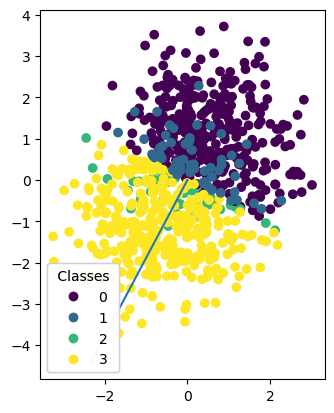

In [37]:
import numpy as np
import matplotlib . pyplot as plt

TOTAL_SAMPLES = 800
most_misclass = 0
mislist = []
np. random . seed (322)
for i in range (1) :
 data1 = np. random . multivariate_normal ([0.5 , 1], cov =[[1 , 0], [0, 1]] ,
size = TOTAL_SAMPLES // 2)
data2 = np. random . multivariate_normal ([ -0.5 , -1], cov =[[1 , 0], [0, 1]] ,
size = TOTAL_SAMPLES // 2)
concat_data = np. concatenate ([ data1 , data2 ], axis =0)
cov = np.cov( concat_data .T, bias = True )

eigenvalues , eigenvectors = np. linalg .eig (cov )
eigenvalue = np.max( eigenvalues )
eigenvector = eigenvectors [:, np. argmax ( eigenvalues )]
print (np. expand_dims ( eigenvector , axis = -1))

signs = np. sign (np. matmul ( concat_data , eigenvector .T))
fn = len( signs [:400][ signs [:400] == 1.])
fp = len( signs [400:][ signs [400:] == -1.])
mislist . append (fp + fn)
labels = np. concatenate ([ signs [:400] + 1, signs [400:] + 2])
 # signs [:400][ signs [:400] == 2] = 3
 # signs [400:][ signs [400:] == 3] = 2
mean = np. mean (np. asarray ( mislist ))
print (f'Mean:{mean}')
print (f'Percentage of misclassification : { mean * 100 / TOTAL_SAMPLES }%' )


fig , ax = plt. subplots ()
scatter = ax. scatter (* concat_data .T, c= labels )
legend1 = ax. legend (* scatter . legend_elements () ,
loc="lower left", title =" Classes ")
ax. add_artist ( legend1 )
ax. plot ([0 , eigenvector [0] * 5], [0, eigenvector [1] * 5])
plt.gca (). set_aspect ('equal', adjustable ='box')
plt. show ()

[[-0.45828478]
 [-0.88880541]]
Mean:8.0
Percentage of misclassification : 1.0%


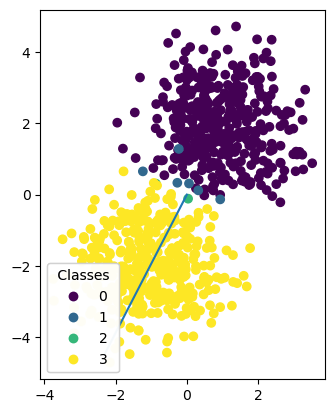

In [39]:
import numpy as np
import matplotlib . pyplot as plt

TOTAL_SAMPLES = 800
most_misclass = 0
mislist = []
np. random . seed (322)
for i in range (1) :
 data1 = np. random . multivariate_normal ([1 , 2], cov =[[1 , 0], [0, 1]] ,
size = TOTAL_SAMPLES // 2)
data2 = np. random . multivariate_normal ([ -1 , -2], cov =[[1 , 0], [0, 1]] ,
size = TOTAL_SAMPLES // 2)
concat_data = np. concatenate ([ data1 , data2 ], axis =0)
cov = np.cov( concat_data .T, bias = True )

eigenvalues , eigenvectors = np. linalg .eig (cov )
eigenvalue = np.max( eigenvalues )
eigenvector = eigenvectors [:, np. argmax ( eigenvalues )]
print (np. expand_dims ( eigenvector , axis = -1))

signs = np. sign (np. matmul ( concat_data , eigenvector .T))
fn = len( signs [:400][ signs [:400] == 1.])
fp = len( signs [400:][ signs [400:] == -1.])
mislist . append (fp + fn)
labels = np. concatenate ([ signs [:400] + 1, signs [400:] + 2])
 # signs [:400][ signs [:400] == 2] = 3
 # signs [400:][ signs [400:] == 3] = 2
mean = np. mean (np. asarray ( mislist ))
print (f'Mean:{mean}')
print (f'Percentage of misclassification : { mean * 100 / TOTAL_SAMPLES }%' )


fig , ax = plt. subplots ()
scatter = ax. scatter (* concat_data .T, c= labels )
legend1 = ax. legend (* scatter . legend_elements () ,
loc="lower left", title =" Classes ")
ax. add_artist ( legend1 )
ax. plot ([0 , eigenvector [0] * 5], [0, eigenvector [1] * 5])
plt.gca (). set_aspect ('equal', adjustable ='box')
plt. show ()

In [8]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . cluster import KMeans
from sklearn . decomposition import PCA


In [10]:
TOTAL_SAMPLES = 1200
most_misclass = 0
mislist = []
np . random . seed (322)
data1 = np . random . multivariate_normal ([ -1 , 3 , -0.5 , 2] , cov =[[1 , 0 , 0 , 0] ,
[0 , 1 , 0 , 0] ,
[0 , 0 , 1 , 0] ,
[0 , 0 , 0 , 1]] ,
size = TOTAL_SAMPLES // 4)


In [12]:
data2 = np . random . multivariate_normal ([1 , 2 , 0.5 , 3.2] , cov =[[1 , 0 , 0 , 0] ,
[0 , 1 , 0 , 0] ,
[0 , 0 , 1 , 0] ,
[0 , 0 , 0 , 1]] ,
size = TOTAL_SAMPLES // 4)
data3 = np . random . multivariate_normal ([ -1 , -2 , -1 , -2] , cov =[[1 , 0 , 0 , 0] ,
[0 , 1 , 0 , 0] ,
[0 , 0 , 1 , 0] ,
[0 , 0 , 0 , 1]] ,
size = TOTAL_SAMPLES // 4)
data4 = np . random . multivariate_normal ([1 , -1.5 , -1.3 , 2] , cov =[[1 , 0 , 0 ,
0] ,
[0 , 1 , 0 , 0] ,
[0 , 0 , 1 , 0] ,
[0 , 0 , 0 , 1]] ,
size = TOTAL_SAMPLES // 4)
concat_data = np . concatenate ([ data1 , data2 , data3 , data4 ] , axis =0)

3


C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[0 1 2 3]


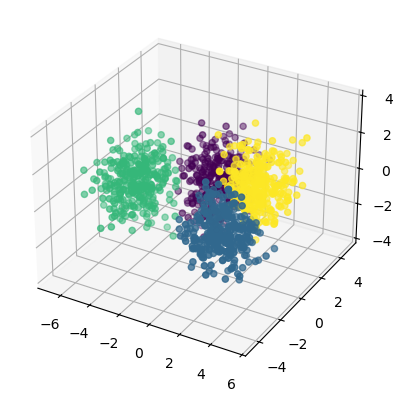

In [24]:
THRESH = 0.9
pca = PCA ( n_components = THRESH )
proc_data = pca . fit_transform ( concat_data ) # Transform data with PCA
print ( pca . n_components_ )
results = KMeans ( n_clusters =4 , init ='random', n_init =100) . fit ( proc_data )
print ( np . unique ( results . labels_ ) )
fig = plt . figure ()
ax1 = fig . add_subplot (1 , 1 , 1 , projection ='3d') # Three integers (nrows ,ncols , index ).
ax1 . scatter (* proc_data .T , c = results . labels_ )
plt . show ()